In [1]:
# model implementation
from ml.models.nn import MLP
from ml.algorithms.optimization import BackpropSGD
from ml.functions.activation import Sigmoid, Identity, Relu

# model selection
from ml.model_selection import GridSearchCV

from ml.functions.metrics.classification import F1Score, BinaryAccuracy, ClassificationError
from ml.functions.metrics.regression import RMSE, MAE, MRE

from ml.stats import ClassificationStats

# data manipulation
from ml.dataset import load_csv, split_train_test
from ml.algorithms.normalization import MinMaxScaler

# Utility
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(25)

## Q1 - Neural Net for classification

### Load dataset
I'm using my implmenentation of k-fold with cross validation to find best hyperparameters.

The code which splits the dataset into **train, validation and test** is left for reference.

In [2]:
X, y = load_csv('./datasets/vowel.csv')
Y = np.eye(11)[y.astype(int)]

#### Split into train (60%), validation (20%) and test (20%) - unused

In [3]:
# X_train, y_train, X_test, y_test = split_train_test(X, y, 0.6, shuffle=True)
# X_train, y_train, X_val, y_val = split_train_test(X_train, y_train, 0.75, shuffle=False)

#### Split into train (70%) and test (30%)

In [4]:
X_train, y_train, X_test, y_test = split_train_test(X, y, 0.7, shuffle=True)

### Scale data

In [5]:
# create min-max scalers
x_scaler = MinMaxScaler().fit(X_train)
# y_scaler = MinMaxScaler().fit(y_train)

# scale train data
X_train_scaled = x_scaler.transform(X_train)
# y_train_scaled = y_scaler.transform(y_train)

# scale test data
X_test_scaled = x_scaler.transform(X_test)
# y_test_scaled = y_scaler.transform(y_test)

### Find best hyperparameters (num neurons and activation function) using grid search

In [6]:
# Classification MLP

print(X.shape)

solver = BackpropSGD(epochs=1000,
                    learning_rate=0.01,
                    regularization=0.001,
                    momentum=0.8,
                    batch_size=32,
                    metrics=ClassificationError())

layers = (
    (3, Sigmoid()),
    (11, Sigmoid()),
)

mlp = MLP(layers=layers, solver=solver)
train_err, test_err = mlp.fit(X_train_scaled, y_train, X_test_scaled, y_test)

(990, 10)
layer 0, shape: (11, 3)
layer 1, shape: (4, 11)
SHAPES
	 delta=(33, 11), x=(33, 4)


ValueError: operands could not be broadcast together with shapes (33,4) (33,11) 

In [12]:
print(y)

[[ 8.]
 [ 2.]
 [ 1.]
 [ 0.]
 [ 5.]
 [ 6.]
 [ 3.]
 [ 9.]
 [ 4.]
 [10.]
 [ 7.]
 [ 8.]
 [ 2.]
 [ 1.]
 [ 0.]
 [ 5.]
 [ 6.]
 [ 3.]
 [ 9.]
 [ 4.]
 [10.]
 [ 7.]
 [ 8.]
 [ 2.]
 [ 1.]
 [ 0.]
 [ 5.]
 [ 6.]
 [ 3.]
 [ 9.]
 [ 4.]
 [10.]
 [ 7.]
 [ 8.]
 [ 2.]
 [ 1.]
 [ 0.]
 [ 5.]
 [ 6.]
 [ 3.]
 [ 9.]
 [ 4.]
 [10.]
 [ 7.]
 [ 8.]
 [ 2.]
 [ 1.]
 [ 0.]
 [ 5.]
 [ 6.]
 [ 3.]
 [ 9.]
 [ 4.]
 [10.]
 [ 7.]
 [ 8.]
 [ 2.]
 [ 1.]
 [ 0.]
 [ 5.]
 [ 6.]
 [ 3.]
 [ 9.]
 [ 4.]
 [10.]
 [ 7.]
 [ 8.]
 [ 2.]
 [ 1.]
 [ 0.]
 [ 5.]
 [ 6.]
 [ 3.]
 [ 9.]
 [ 4.]
 [10.]
 [ 7.]
 [ 8.]
 [ 2.]
 [ 1.]
 [ 0.]
 [ 5.]
 [ 6.]
 [ 3.]
 [ 9.]
 [ 4.]
 [10.]
 [ 7.]
 [ 8.]
 [ 2.]
 [ 1.]
 [ 0.]
 [ 5.]
 [ 6.]
 [ 3.]
 [ 9.]
 [ 4.]
 [10.]
 [ 7.]
 [ 8.]
 [ 2.]
 [ 1.]
 [ 0.]
 [ 5.]
 [ 6.]
 [ 3.]
 [ 9.]
 [ 4.]
 [10.]
 [ 7.]
 [ 8.]
 [ 2.]
 [ 1.]
 [ 0.]
 [ 5.]
 [ 6.]
 [ 3.]
 [ 9.]
 [ 4.]
 [10.]
 [ 7.]
 [ 8.]
 [ 2.]
 [ 1.]
 [ 0.]
 [ 5.]
 [ 6.]
 [ 3.]
 [ 9.]
 [ 4.]
 [10.]
 [ 7.]
 [ 8.]
 [ 2.]
 [ 1.]
 [ 0.]
 [ 5.]
 [ 6.]
 [ 3.]
 [ 9.]
 [ 4.]
 [10.]
 [ 7.]

Text(0.5, 0, 'Epoch')

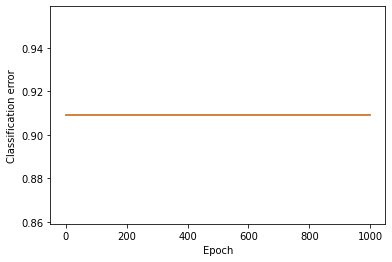

In [11]:
plt.plot(train_err)
plt.plot(test_err)

plt.ylabel("Classification error")
plt.xlabel("Epoch")

In [ ]:
y_hat = mlp.predict_proba(X_test_scaled)

acc = BinaryAccuracy()
acc.measure(y_test, y_hat)

In [17]:
# grid = GridSearchCV()

# # fixed hyperparams
# reg = 0.001
# momentum=0.8

# for lr in [0.1]:
#     for num_neurons in [16, 32]:
#         for function in [Relu, Sigmoid]:

#             solver = BackpropSGD(epochs=1000,
#                         learning_rate=lr,     # <-- hyperparam under test
#                         regularization=reg,
#                         momentum=momentum,
#                         batch_size=32,
#                         metrics=RMSE())

#             layers = (
#                 (num_neurons, function()),     # <-- hyperparams under test
#                 (1, Sigmoid()),
#             )

#             grid.add(MLP, {
#                 "layers":layers,
#                 "input_width": X_train.shape[1],
#                 "solver": solver,
#                 "is_classifier": True})

# best = grid.search(X_train_scaled, y_train_scaled, num_folds=10, shuffle=False)

AttributeError: 'NoneType' object has no attribute 'shape'

### Hyperparameters of the best MLP

In [ ]:
print("Best hyperparameters for MLP:", best[1])

Best hyperparameters for MLP: {'layers': ((16, Sigmoid), (1, Identity)), 'input_width': 8, 'solver': Epochs=1000, LearningRate=0.1, Regularization=0.001, Momentum=0.8}


## Drafts

In [ ]:
# Regression MLP

solver = BackpropSGD(epochs=1000,
                    learning_rate=0.1,
                    regularization=0.001,
                    momentum=0.8,
                    batch_size=32,
                    metrics=RMSE())
# 
layers = (
    (16, Sigmoid()),  # <-- hyperparams we are evaluating
    (1, Identity()),
)
# 
mlp = MLP(layers=layers, input_width=X_train.shape[1], solver=solver)
train_err, test_err = mlp.fit(X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled)

In [20]:
print(X_test.shape)

(297, 10)


In [18]:
# Classification MLP

solver = BackpropSGD(epochs=1000,
                    learning_rate=0.1,
                    regularization=0.001,
                    momentum=0.8,
                    batch_size=32,
                    metrics=RMSE())
# 
layers = (
    (16, Sigmoid()),  # <-- hyperparams we are evaluating
    (1, Sigmoid()),
)
# 
mlp = MLP(layers=layers, input_width=X_train.shape[1], solver=solver)
train_err, test_err = mlp.fit(X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled)

ValueError: operands could not be broadcast together with shapes (33,17) (33,33) 